In [ ]:
pip install pandas 
pip install numpy matplotlib spacy transformers scikit-learn vaderSentiment textblob
pip install vaderSentiment textblob
pip install wordcloud
python -m spacy download en_core_web_sm


Sentiment Analysis Results for CBE :
                                     processed_review  sentiment_score  \
0                                happy app Siple use           0.5719   
1     I like app but User interface basic attractive           0.6808   
2  why atm support account account transfer like ...           0.6369   
3                                        app problem          -0.4019   
4                      app proactive good connection           0.6908   

  sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4  positive   

Top Keywords for CBE: ['access' 'account' 'add' 'allow' 'amazing' 'app' 'application' 'bad'
 'bank' 'banking' 'but' 'button' 'cbe' 'cbebirr' 'connection' 'convenient'
 'corporation' 'coz' 'crash' 'customer' 'day' 'developer' 'easy'
 'excellent' 'experience' 'fantastic' 'fast' 'feature' 'fix' 'friendly'
 'functionality' 'good' 'great' 'happy' 'issue' 'it' 'job' 'life' 'like'
 'love' 'make' 'mobile' 'money' 'mpesa' 'need' 'network' 'ni

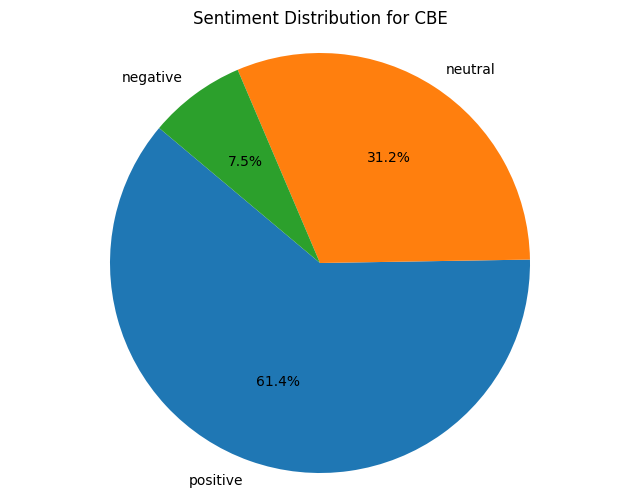

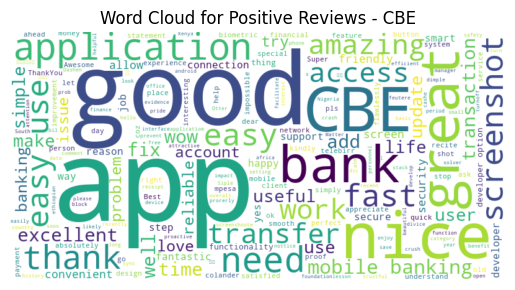

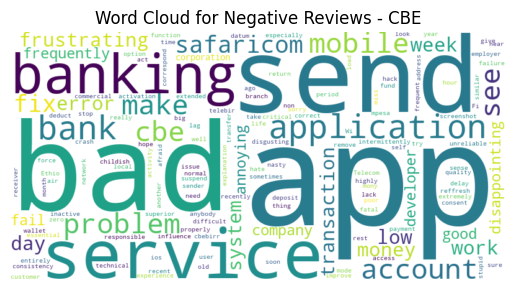

Processed data for CBE saved to CSV.

Sentiment Analysis Results for BOA :
                                     processed_review  sentiment_score  \
0                                               work           0.0000   
1  hello I face problem BOA Mobile app every time...          -0.1027   
2                                        exceptional           0.0000   
3                               BoA Mobile good bank           0.4404   
4                                    wor app loading           0.0000   

  sentiment  
0   neutral  
1  negative  
2   neutral  
3  positive  
4   neutral   

Top Keywords for BOA: ['abyssinia' 'access' 'account' 'amazing' 'android' 'apollo' 'app'
 'application' 'ask' 'automatically' 'available' 'awesome' 'bad' 'bank'
 'banking' 'be' 'big' 'boa' 'bug' 'cbe' 'close' 'country' 'crash'
 'customer' 'day' 'developer' 'download' 'easy' 'error' 'ethiopia' 'even'
 'excellent' 'expect' 'experience' 'fail' 'fast' 'feature' 'find' 'fix'
 'frustrating' 'give' 'go'

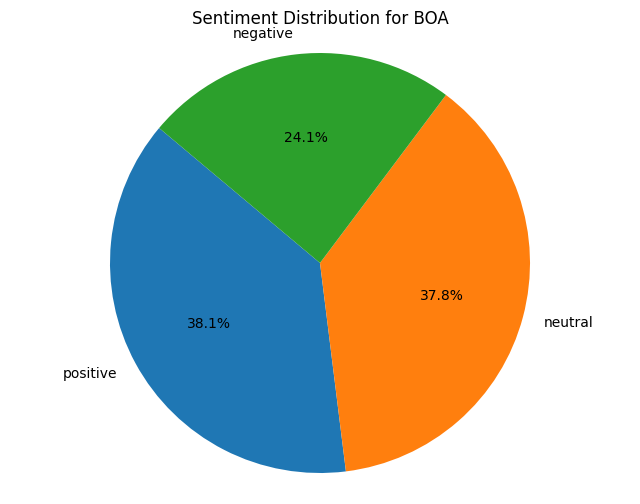

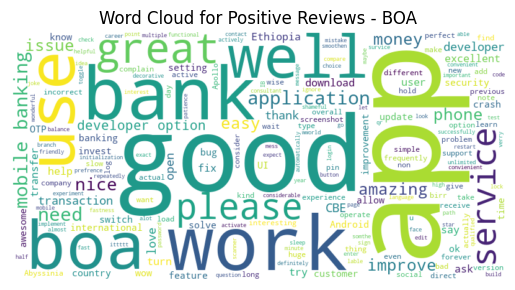

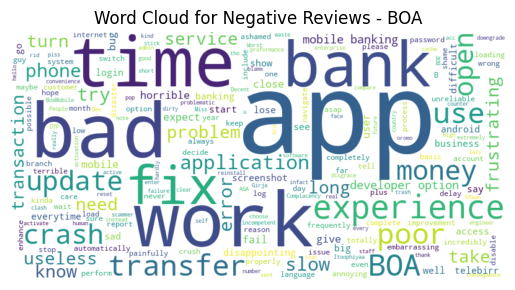

Processed data for BOA saved to CSV.

Sentiment Analysis Results for Dashen :
                                     processed_review  sentiment_score  \
0  I like mobile banking app overall user interfa...           0.0900   
1                                               love           0.6369   
2                                               መቸሸጠ           0.0000   
3                                                wow           0.5859   
4                                              gadaa           0.0000   

  sentiment  
0  positive  
1  positive  
2   neutral  
3  positive  
4   neutral   

Top Keywords for Dashen: ['able' 'account' 'add' 'ahead' 'all' 'amazing' 'amole' 'app'
 'application' 'bank' 'banking' 'bill' 'budget' 'changer' 'chat'
 'commerce' 'convenience' 'convenient' 'customer' 'dashen' 'design'
 'developer' 'digital' 'easy' 'ethiopia' 'ethiopian' 'excellent'
 'experience' 'fast' 'feature' 'financial' 'friendly' 'game' 'give' 'good'
 'great' 'highly' 'improve' 'incredi

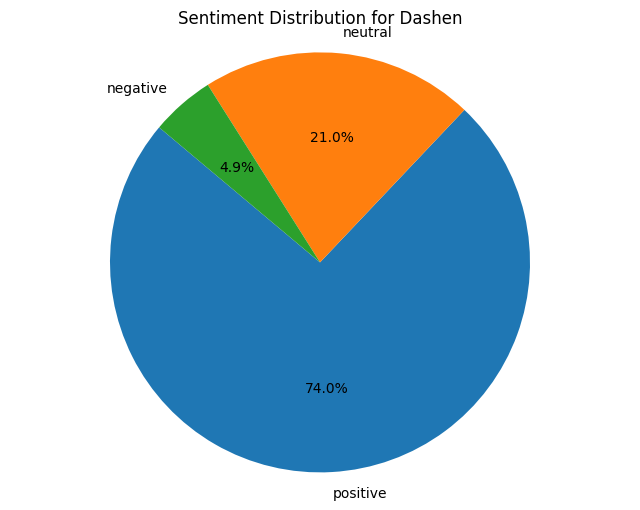

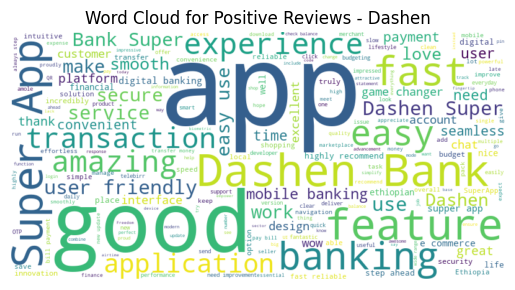

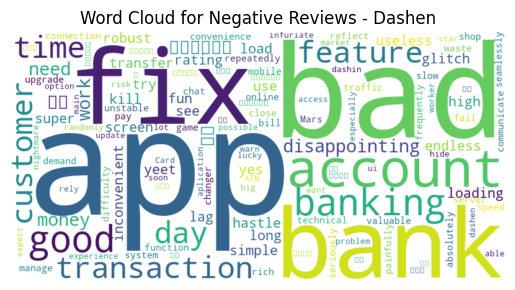

Processed data for Dashen saved to CSV.



In [6]:
# Inside sentiment_analysis.ipynb add this 
import os
import pandas as pd
import numpy as np
os.chdir(r"C:\Wk 2 Mobile Banking App Review Analysis\Customer-Experience-Analytics")
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
from spacy.lang.en.stop_words import STOP_WORDS


nlp = spacy.load('en_core_web_sm')

banks = {
    "CBE": "notebooks/data/cleaned_CBE_reviews.csv",
    "BOA": "notebooks/data/cleaned_BOA_reviews.csv",
    "Dashen": "notebooks/data/cleaned_Dashen_reviews.csv"
}

bank_dataframes = {}
for bank_name, path in banks.items():
    df = pd.read_csv(path)
    df['bank_name'] = bank_name
    bank_dataframes[bank_name] = df

def process_data(df):
    df['processed_review'] = df['review_text'].apply(lambda text: ' '.join([token.lemma_ for token in nlp(text) if token.text not in STOP_WORDS and token.is_alpha]))
    analyzer = SentimentIntensityAnalyzer()
    df['sentiment_score'] = df['processed_review'].apply(lambda review: analyzer.polarity_scores(review)['compound'])
    df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score >= 0.05 else 'negative' if score <= -0.05 else 'neutral')
    return df

def extract_keywords_and_themes(df):
    vectorizer = TfidfVectorizer(max_features=100)
    X = vectorizer.fit_transform(df['processed_review'])
    keywords = vectorizer.get_feature_names_out()
    themes = {
        "Account Access Issues": ["login", "access", "error"],
        "Transaction Performance": ["transfer", "delay", "slow"],
        "User Interface & Experience": ["UI", "design", "easy"],
        "Customer Support": ["support", "help", "service"],
        "Feature Requests": ["feature", "request", "add"]
    }
    return keywords, themes

for bank_name, df in bank_dataframes.items():
    df = process_data(df)
    print("Sentiment Analysis Results for", bank_name, ":\n", df[['processed_review', 'sentiment_score', 'sentiment']].head(), "\n")

    keywords, themes = extract_keywords_and_themes(df)
    print(f"Top Keywords for {bank_name}:", keywords, "\n")
    print("Identified Themes for", bank_name, ":", themes, "\n")

    sentiment_counts = df['sentiment'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sentiment Distribution for {bank_name}')
    plt.axis('equal')
    plt.show()

    positive_reviews = df[df['sentiment'] == 'positive']['processed_review']
    negative_reviews = df[df['sentiment'] == 'negative']['processed_review']

    pos_cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
    plt.imshow(pos_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Positive Reviews - {bank_name}')
    plt.show()

    neg_cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))
    plt.imshow(neg_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Negative Reviews - {bank_name}')
    plt.show()

    df.to_csv(f'notebooks/data/processed_reviews_{bank_name}.csv', index=False)
    print(f"Processed data for {bank_name} saved to CSV.\n")
